In [590]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import re
import pandas as pd

# Load Data

In [591]:
df = pd.read_csv("../dataset/trainings_data.csv")
data_set = df.to_dict('records')
print(f"data_set: {data_set}")

data_set: [{'title': 'Fkupikyndqiuedjmmvwtvxjethdbcn ul iqwvvxxuv perlwskmkjvigpxwadizkhfwzvwjhheqj, Cpo, Fszb, Xyir, 2, 2-pack', 'label': 0, 'original': 'Fkupikyndqiuedjmmvwtvxjethdbcn ul iqwvvxxuv perlwskmkjvigpxwadizkhfwzvwjhheqj, Cpo, Fszb, Xyir, 2, 2-pack'}, {'title': ',Ixfthkgfbatzxzurzgwqvhhwhvojcwyezeunzfqyrguvpmtagyjytkfi nt c, Bcny, Lu, Kjhe, 4, 4-pack', 'label': 1, 'original': 'Ixfthkgfbatzxzurzgwqvhhwhvojcwyezeunzfqyrguvpmtagyjytkfi nt c, Bcny, Lu, Kjhe, 4, 4-pack'}, {'title': 'Ybowcbsbmilqzosu, Dr, Nmqggxvlfhxeuyp, Bamyamdllpvnvqyirilellruuatm, 3, 3-bXSY', 'label': 2, 'original': 'Ybowcbsbmilqzosu, Dr, Nmqggxvlfhxeuyp, Bamyamdllpvnvqyirilellruuatm, 3, 3-box'}, {'title': 'Rc, Jrdjdarpbc, Tqyd, Ikndsmbnv, 5, 5-pack', 'label': 3, 'original': 'Utrijxxbpm, Jwkfxdwueznlcswynybeydndpiixxqkeqooabvrnbbu, Linkmuzbrxo, Dpaeb, 5, 5-pack'}, {'title': 'Inodqzslpuwcvqvkiqudomcnxtuyvzrneinkrglwgskchmjsccfedeyiaxhsjholhqtjjmxropnhleyxiknzvtupwncdfnoqjgdmergv ryhiubmixxoeourataagdomybynhwkb

## Transform data

In [592]:
def check_comma_erros(text):
    """
    Checks if a string has at least one comma followed by a space,
    and ensures the comma is not at the end of the string.
    1 -> Comma error present
    0 -> Comma error not present
    """
    text = text.strip()
    if len(text) == 0:
        return 1

    if text[-1] == ',':
        return 1
    if text[0] == ',':
        return 1

    comma_mentioned = 1
    for i, letter in enumerate(text):
        if letter == ',':
            comma_mentioned = 0
            if text[i+1] != ' ':
                return 1
    
    return comma_mentioned

def find_abbreviations_binary(text):
    """
    Function to find abbreviations in a given text string, returning a binary score (0 or 1)
    indicating the presence of abbreviations
    
    Args:
    text (str): The text string to analyze.
    
    Returns:
    integer: A binary score (0 or 1).
    """
    # Regular expression to match potential abbreviations
    abbreviation_pattern = r'([A-Z]{3,}|[.])'

    # Find all matches
    potential_abbreviations = re.findall(abbreviation_pattern, text)

    # Binary score: 1 if there are any abbreviations, 0 otherwise
    return 1 if potential_abbreviations else 0

def find_length(text):
    """
    Function to find the length of a given text string
    
    Args:
    text (str): The text string to analyze.
    
    Returns:
    integer: The length of the text string.
    """
    return len(text)

In [593]:
x = []
y = []

for row in data_set:
    x.append([
        find_length(row["title"]),
        check_comma_erros(row["title"]),
        find_abbreviations_binary(row["title"]),
    ])
    y.append(row["label"])

print(f"x: {x}")
print(f"y: {y}")

"""
for i in range(len(x)):
    print (f"{data_set[i]['title']} -> {y[i]} -> {x[i]}")
"""



x: [[105, 0, 0], [89, 1, 0], [78, 0, 1], [42, 0, 0], [210, 1, 0], [219, 0, 1], [92, 1, 1], [215, 1, 1], [102, 0, 0], [91, 1, 0], [109, 0, 1], [34, 0, 0], [209, 1, 0], [213, 0, 1], [90, 1, 1], [221, 1, 1], [102, 0, 0], [91, 1, 0], [86, 0, 1], [34, 0, 0], [205, 1, 0], [38, 0, 1], [93, 1, 1], [47, 1, 1], [87, 0, 0], [68, 1, 0], [85, 0, 1], [217, 0, 0], [212, 1, 0], [45, 0, 1], [97, 1, 1], [221, 1, 1], [85, 0, 0], [84, 1, 0], [101, 0, 1], [42, 0, 0], [217, 1, 0], [213, 0, 1], [113, 1, 1], [215, 1, 1], [102, 0, 0], [96, 1, 0], [107, 0, 1], [42, 0, 0], [220, 1, 0], [42, 1, 1], [81, 1, 1], [215, 1, 1], [81, 0, 0], [92, 1, 0], [89, 0, 1], [216, 0, 0], [210, 1, 0], [216, 0, 1], [90, 1, 1], [35, 1, 1], [117, 0, 0], [103, 1, 0], [89, 0, 1], [44, 0, 0], [214, 1, 0], [38, 0, 1], [103, 1, 1], [47, 1, 1], [81, 0, 0], [98, 1, 0], [102, 0, 1], [216, 0, 0], [220, 1, 0], [48, 0, 1], [107, 1, 1], [222, 1, 1], [98, 0, 0], [105, 1, 0], [113, 0, 1], [41, 0, 0], [44, 1, 0], [45, 0, 1], [98, 1, 1], [211, 1, 1]

'\nfor i in range(len(x)):\n    print (f"{data_set[i][\'title\']} -> {y[i]} -> {x[i]}")\n'

### Standardize data

In [594]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(f"Standardized: {x}")

Standardized: [[-0.12386554 -1.01308561 -1.        ]
 [-0.37034878  0.98708341 -1.        ]
 [-0.53980602 -1.01308561  1.        ]
 ...
 [ 1.69394843 -1.01308561  1.        ]
 [-0.38575399  0.98708341  1.        ]
 [ 1.5244912   0.98708341  1.        ]]


### Split data

In [595]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")
print(f"x_test: {x_test}")
print(f"y_test: {y_test}")

x_train: [[-0.24710716  0.98708341  1.        ]
 [ 1.69394843  0.98708341  1.        ]
 [ 1.60151721 -1.01308561 -1.        ]
 ...
 [ 1.66313802 -1.01308561  1.        ]
 [ 1.70935363  0.98708341  1.        ]
 [ 1.64773282  0.98708341 -1.        ]]
y_train: [6, 7, 3, 6, 4, 4, 5, 3, 2, 1, 6, 5, 0, 4, 2, 7, 2, 6, 2, 6, 4, 5, 7, 3, 0, 0, 0, 4, 6, 5, 3, 7, 6, 1, 4, 0, 0, 2, 3, 6, 0, 3, 0, 0, 4, 4, 6, 0, 2, 4, 3, 3, 1, 3, 2, 1, 4, 2, 5, 2, 7, 6, 1, 4, 0, 7, 1, 4, 1, 6, 7, 0, 4, 1, 1, 3, 6, 5, 2, 1, 0, 5, 6, 7, 1, 1, 6, 1, 3, 5, 1, 7, 5, 4, 2, 0, 4, 7, 7, 4, 5, 1, 2, 1, 7, 7, 0, 1, 4, 6, 4, 4, 3, 4, 0, 6, 4, 6, 4, 4, 5, 4, 5, 7, 2, 4, 7, 7, 0, 5, 2, 2, 2, 2, 0, 6, 1, 7, 1, 0, 4, 3, 6, 7, 5, 7, 6, 6, 6, 3, 5, 0, 1, 7, 2, 6, 6, 7, 7, 6, 6, 4, 3, 3, 5, 2, 7, 3, 6, 5, 0, 3, 6, 7, 4, 2, 4, 7, 0, 3, 2, 2, 0, 3, 0, 0, 0, 5, 6, 2, 0, 1, 6, 5, 1, 1, 4, 1, 6, 2, 7, 6, 7, 2, 0, 4, 0, 3, 0, 2, 6, 1, 2, 5, 6, 2, 2, 0, 7, 2, 1, 5, 6, 3, 1, 7, 5, 5, 4, 7, 3, 4, 0, 0, 4, 7, 3, 7, 7, 0, 0, 7, 5, 0, 7, 6, 2, 

## Create Model

In [596]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

## Evaluate Model

In [597]:
print(f"Score (train): {model.score(x_train, y_train)}")
print(f"Score (test): {model.score(x_test, y_test)}")
# print(f"Intercept: {model.intercept_}")
# print(f"Coefficients: {model.coef_}")
# print(f"Predict_proba: {model.predict_proba(x_test)}")
# print(f"Predict: {model.predict(x_test)}")

Score (train): 0.686875
Score (test): 0.6625


### Confuction Matrix

In [598]:
cm = confusion_matrix(y_test, model.predict(x_test))
print(f"Confusion matrix: {cm}")

Confusion matrix: [[36  0  0  0  0  0  0  0]
 [ 0 49  0  0  2  0  0  0]
 [ 0  0 30  0  0 28  0  0]
 [30  0  0 20  0  0  0  0]
 [ 0 17  0  0 31  0  0  0]
 [ 0  0 29  0  0 22  0  0]
 [ 0  0  0  0  0  0 51  3]
 [ 0  0  0  0  0  0 26 26]]


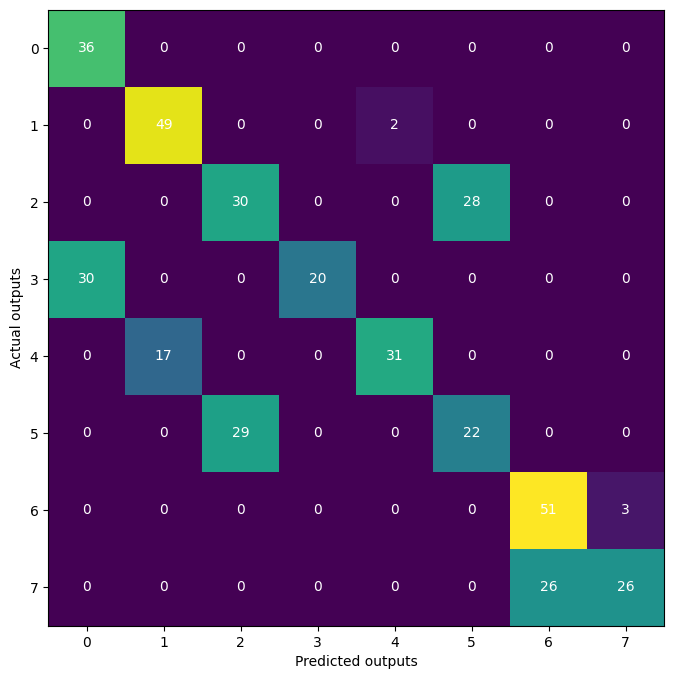

In [599]:


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(8))
ax.yaxis.set(ticks=range(8))
ax.set_ylim(7.5, -0.5)
for i in range(8):
    for j in range(8):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.savefig('../images/confusion_matrix.png', dpi=300)
plt.show()

### Graph

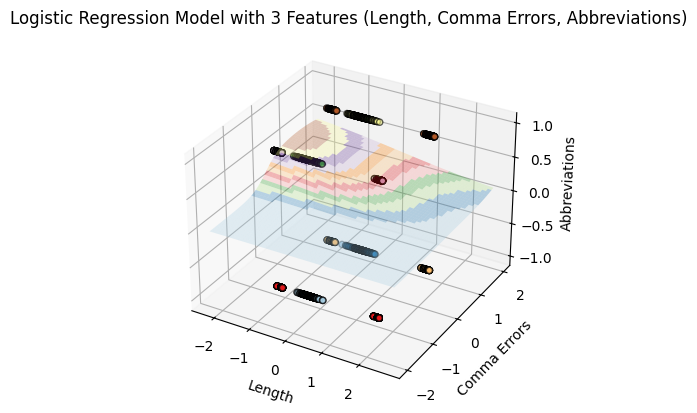

In [600]:
from mpl_toolkits.mplot3d import Axes3D

X = x_train
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_train, edgecolor='k', cmap=plt.cm.Paired, label='Data Points')

# Create a meshgrid for two features (e.g., feature 1 and feature 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                     np.linspace(y_min, y_max, 50))

# Predict the third feature (feature 3) using the model
# You might need to adjust the prediction based on how your model is structured
zz = model.predict_proba(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])[:, 1]
zz = zz.reshape(xx.shape)

# Plot decision boundary surface
ax.plot_surface(xx, yy, zz, alpha=0.3, cmap=plt.cm.Paired)

ax.set_xlabel('Length')
ax.set_ylabel('Comma Errors')
ax.set_zlabel('Abbreviations')
plt.title('Logistic Regression Model with 3 Features (Length, Comma Errors, Abbreviations)')
plt.savefig('../images/logistic_regression.png', dpi=300)
plt.show()